# Question 8 : "THE LEAGUE" (16 points)

### Description

In this football problem, you will work like a data scientist and use real world data to perform a Bayesian Update on the distribution of the Goal Scoring Rate for two teams, Manchester United and Liverpool. 


### Questions 

a. Import the necessary libraries, read the "league_tables.csv" file, and remove rows that are not Liverpool or Manchester United. (2 points)

b. Create two separate dataframes for the two teams and calculate the average goal scoring rate (sum of GF / sum of MP) for each team. (3 points)

c. Fit the gamma distribution for both teams. (2 points)

d. (Given the Poisson likelihood function and update function from the textbook) : Find the updated distribution for Liverpool and Manchester United. For each, also graph the Prior and Posterior distributions in the same plot. (6 points)

e. Suppose Manchester and Liverpool play each other and the resulting score is 3 (Manchester) - 2 (Liverpool). How certain are we that Manchester is the better team? 


### Part a 

In [1]:
#importing libraries
import pandas as pd
from scipy.stats import poisson
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('league_tables.csv')
df.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN


In [3]:
df = df[df['Team'].isin(['Liverpool', 'Manchester Utd'])]

In [4]:
df.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
9,1993,Liverpool,6,42,16,11,15,62,55,7,59,NaN
11,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
30,1994,Liverpool,8,42,17,9,16,59,55,4,60,NaN
32,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
54,1995,Liverpool,4,42,21,11,10,65,37,28,74,→ UEFA Cup via league finish


### Part b

Here are two dataframes contain the values for Liverpool and Man Utd only for easier calculations.

In [5]:
liverpool = df[df['Team'].isin(['Liverpool'])]
man_utd = df[df['Team'].isin(['Manchester Utd'])]

In [6]:
#average goal-scoring rate for Liverpool
liv_avg = liverpool["GF"].sum() / liverpool["MP"].sum()

In [7]:
#average goal-scoring rate for Manchester United
man_avg = man_utd["GF"].sum() / man_utd["MP"].sum()

### Part c

In [8]:
liv_gamma = [gamma.pdf(lam, liv_avg) for lam in np.arange(0, 10, .1)]
man_gamma = [gamma.pdf(lam, man_avg) for lam in np.arange(0, 10, .1)]


### Functions

In [9]:
def likelihood_poisson(lam, data):
    '''Returns the likelihood of seeing a k goals for goal scoring rate lambda'''
    return [poisson.pmf(data, l)  for l in lam]

def update(distribution, likelihood):
    '''our standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

### Part d

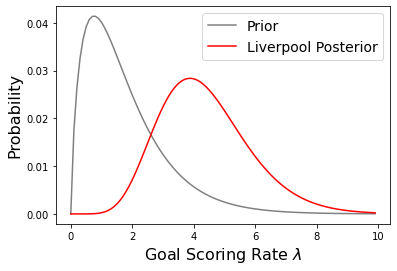

In [10]:
prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':liv_gamma/sum(liv_gamma)})
liv = prior.copy()
update(liv, likelihood_poisson(liv['lams'], 7));


plt.plot(prior['lams'], prior['probs'], color="gray")
plt.plot(liv['lams'], liv['probs'], color="red")
plt.legend(['Prior', 'Liverpool Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16);

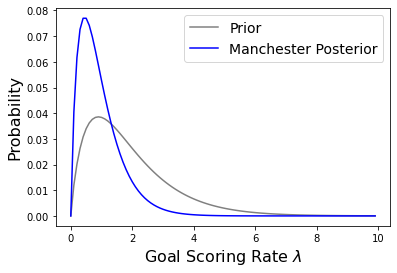

In [11]:
prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':man_gamma/sum(man_gamma)})
man = prior.copy()
update(man, likelihood_poisson(man['lams'], 0))

plt.plot(prior['lams'], prior['probs'], color="gray")
plt.plot(man['lams'], man['probs'], color="blue")
plt.legend(['Prior', 'Manchester Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16);

### Part e

We want to use the probability of superiority to see if a random value from Manchester's posterior distribution is higher than a random value of Liverpool's posterior distribution. 

In [12]:
def prob_of_s(dist1, dist2):
    total = 0
    for index1, row1 in dist1.iterrows():
        for index2, row2 in dist2.iterrows():
            if row1['lams'] > row2['lams']:
                total += row1['probs'] * row2['probs']
    return total
prob_of_s(man, liv)

0.010030216880671817